In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# function defined here
def likelihood(theta,y):
    return (math.factorial(10)/(math.factorial(y)*math.factorial(10-y)))*((theta**y)*((1-theta)**(10-y)))

def prior(theta):
    if(theta>=0 and theta<=1):
        return 1
    else:
        return 0

def posterior(theta,y):
    return likelihood(theta,y)*prior(theta)*11

In [3]:
y = 7
theta_asked = [0.75, 0.25, 1]
for theta in theta_asked:
    print(f'Value of Posterior at (theta = {theta : .2f}) is : ',posterior(theta,y))

Value of Posterior at (theta =  0.75) is :  2.7531051635742188
Value of Posterior at (theta =  0.25) is :  0.03398895263671875
Value of Posterior at (theta =  1.00) is :  0.0


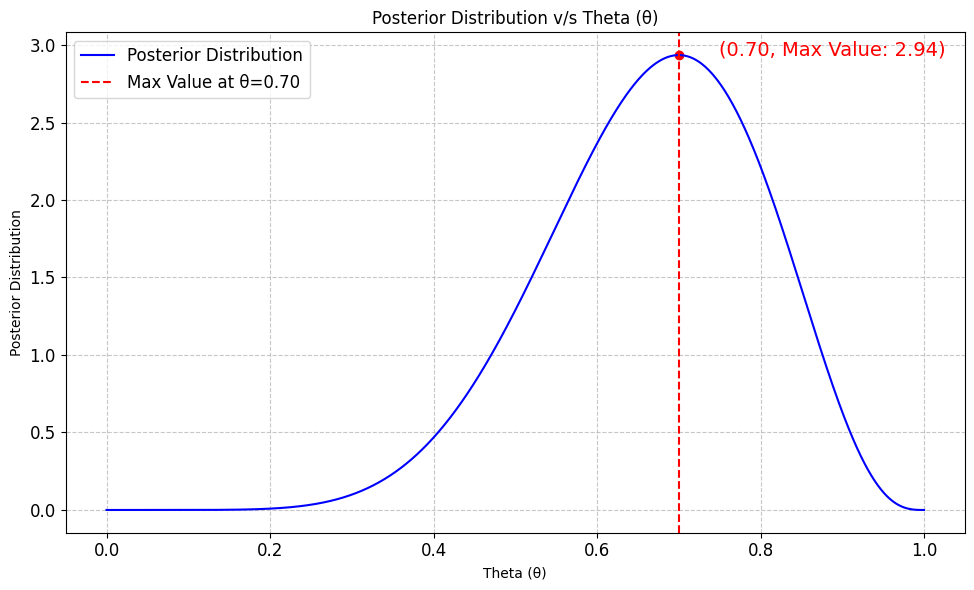

In [4]:
theta_array = np.linspace(0,1,1000)
posterior_plot = [posterior(theta_,y) for theta_ in theta_array]
# Find the index of the maximum y value
max_idx = np.argmax(posterior_plot)
max_theta = theta_array[max_idx]
max_posterior = posterior_plot[max_idx]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(theta_array, posterior_plot, label='Posterior Distribution', color='blue')
plt.axvline(x=max_theta, color='red', linestyle='--', label=f'Max Value at θ={max_theta:.2f}')
plt.scatter([max_theta], [max_posterior], color='red')


plt.annotate(f'({max_theta:.2f}, Max Value: {max_posterior:.2f})',
             xy=(max_theta, max_posterior), 
             xytext=(max_theta + 0.05, max_posterior),
             fontsize=14, color='red')
# Add grid, labels, legend, and title
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Theta (θ)')
plt.ylabel('Posterior Distribution')
plt.title('Posterior Distribution v/s Theta (θ)')
plt.legend()

# Customizations for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
print(f'Max value of Posterior at (theta = {max_theta : .2f}) is : {max_posterior:.2f}')

Max value of Posterior at (theta =  0.70) is : 2.94


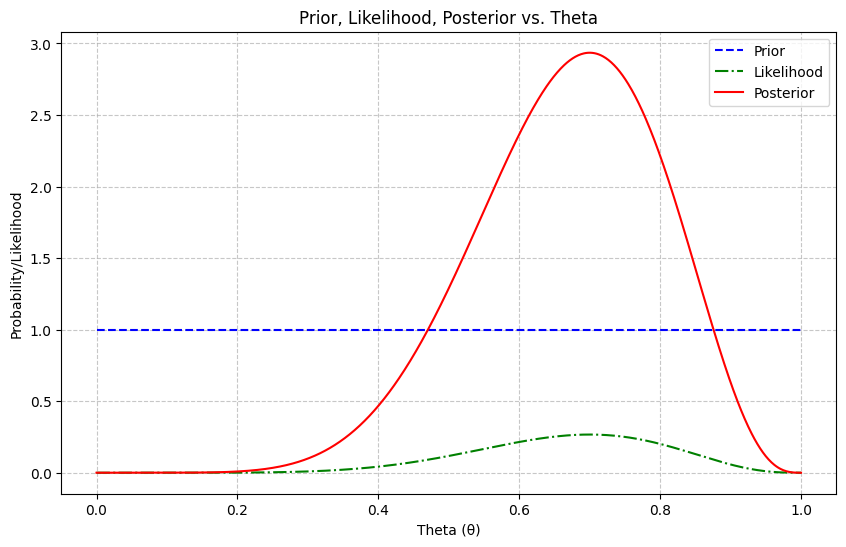

In [6]:
prior_plot = [prior(theta_) for theta_ in theta_array]
likelihood_plot = [likelihood(theta_,y) for theta_ in theta_array]

plt.figure(figsize=(10, 6))
plt.plot(theta_array, prior_plot, label='Prior', color='blue', linestyle='--')
plt.plot(theta_array, likelihood_plot, label='Likelihood', color='green', linestyle='dashdot')
plt.plot(theta_array, posterior_plot, label='Posterior', color='red', linestyle='solid')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Theta (θ)')
plt.ylabel('Probability/Likelihood')
plt.title('Prior, Likelihood, Posterior vs. Theta')
plt.legend()

# Show the plot
plt.show()

Q2 below

In [7]:
def likelihood(sigma,mu,y):
    n = len(y)
    var = np.sum([(y_-mu)**2 for y_ in y])
    return (1/((sigma*np.sqrt(2*math.pi))**n))*(np.exp(-(var)/(2*(sigma**2))))

def prior(mu):
    mu_prior = 250
    sigma_prior = 25
    return (1/(np.sqrt(2*np.pi*(sigma_prior**2))))*np.exp(-((mu - mu_prior)**2)/(2*(sigma_prior**2)))

def posterior(sigma,mu,y):
    return likelihood(sigma,mu,y)*prior(mu)

In [8]:
sigma = 50
y = np.array([300, 270, 390, 450, 500, 290,680, 450])
mu = [300,900,50]
for mu_ in mu:
    print(f'Value of Unnormalized Posterior at (mean = {mu_ : .2f}) is : ',posterior(sigma, mu_, y))
print("\n")

Value of Unnormalized Posterior at (mean =  300.00) is :  6.824247957486409e-41
Value of Unnormalized Posterior at (mean =  900.00) is :  0.0
Value of Unnormalized Posterior at (mean =  50.00) is :  9.691373559300655e-138




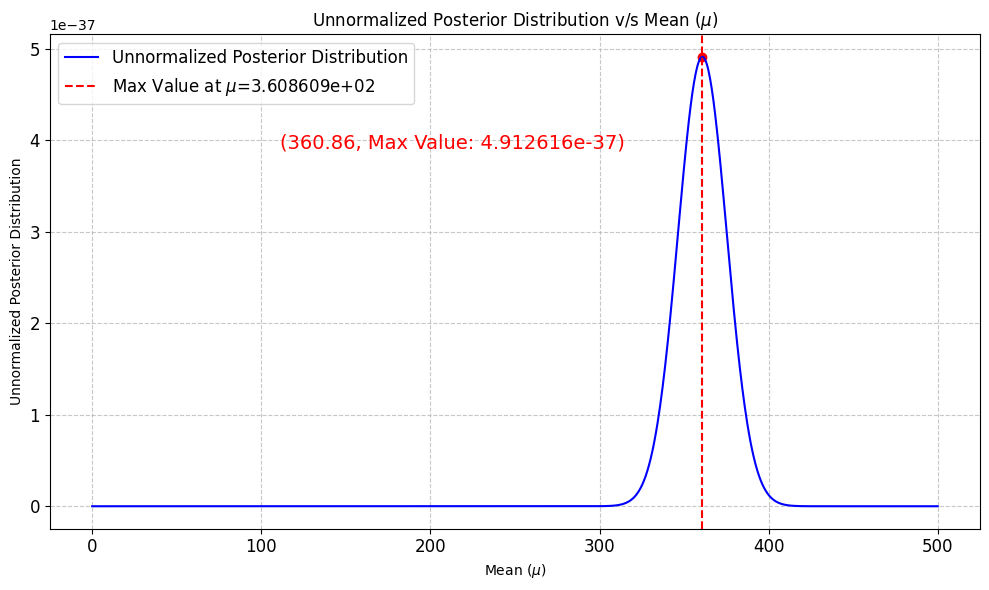

In [9]:
mu_array = np.linspace(0,500,1000)
unnormalized_posterior_plot = [posterior(sigma,mu_,y) for mu_ in mu_array]

# Find the index of the maximum y value
max_idx = np.argmax(unnormalized_posterior_plot)
max_mu = mu_array[max_idx]
max_posterior = unnormalized_posterior_plot[max_idx]
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(mu_array, unnormalized_posterior_plot, label='Unnormalized Posterior Distribution', color='blue')
plt.axvline(x=max_mu, color='red', linestyle='--', label=f'Max Value at $\mu$={max_mu:e}')
plt.scatter([max_mu], [max_posterior], color='red')


plt.annotate(f'({max_mu:.2f}, Max Value: {max_posterior:e})',
             xy=(max_mu, max_posterior), 
             xytext=(max_mu - 250, max_posterior-1e-37),
             fontsize=14, color='red')
# Add grid, labels, legend, and title
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean ($\mu$)')
plt.ylabel('Unnormalized Posterior Distribution')
plt.title('Unnormalized Posterior Distribution v/s Mean ($\mu$)')
plt.legend()

# Customizations for better visualization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


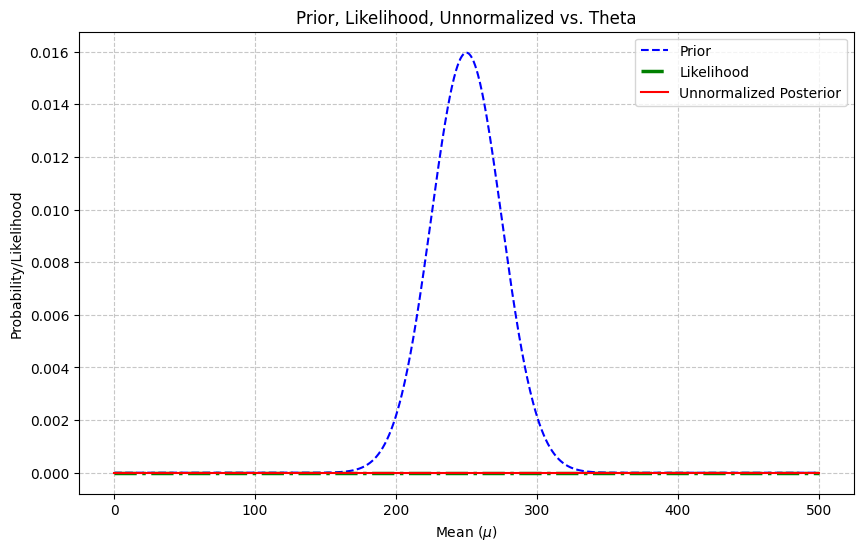

In [10]:
prior_plot = [prior(mu_) for mu_ in mu_array]
likelihood_plot = [likelihood(sigma,mu_,y) for mu_ in mu_array]

plt.figure(figsize=(10, 6))
plt.plot(mu_array, prior_plot, label='Prior', color='blue', linestyle='--')
plt.plot(mu_array, likelihood_plot, label='Likelihood', color='green', linestyle='dashdot', linewidth=2.5)
plt.plot(mu_array, unnormalized_posterior_plot, label='Unnormalized Posterior', color='red', linestyle='solid')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean ($\mu$)')
plt.ylabel('Probability/Likelihood')
plt.title('Prior, Likelihood, Unnormalized vs. Theta')
plt.legend()

# Show the plot
plt.show()

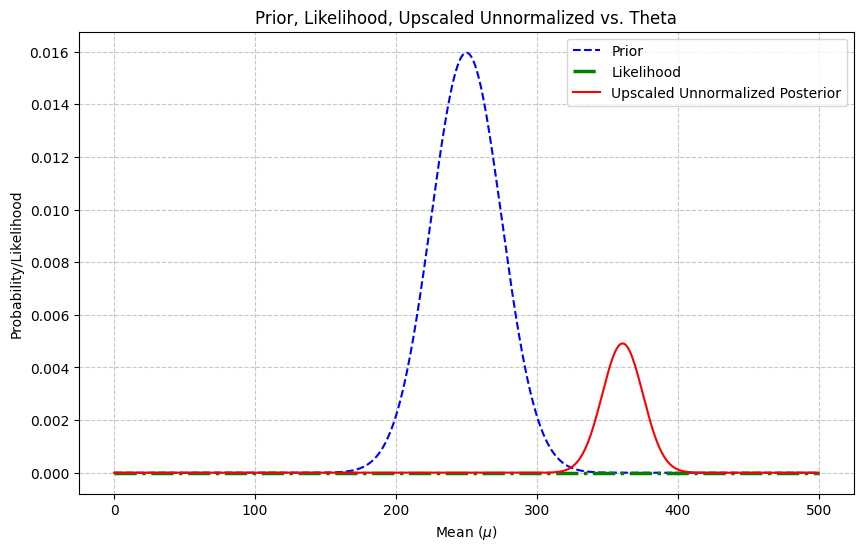

In [11]:
# Let scale up the posterior a bit
upscaled_unnormalized = [unnormalized_posterior_plot_*1e34 for unnormalized_posterior_plot_ in unnormalized_posterior_plot]

plt.figure(figsize=(10, 6))
plt.plot(mu_array, prior_plot, label='Prior', color='blue', linestyle='--')
plt.plot(mu_array, likelihood_plot, label='Likelihood', color='green', linestyle='dashdot', linewidth=2.5)
plt.plot(mu_array, upscaled_unnormalized, label='Upscaled Unnormalized Posterior', color='red', linestyle='solid')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Mean ($\mu$)')
plt.ylabel('Probability/Likelihood')
plt.title('Prior, Likelihood, Upscaled Unnormalized vs. Theta')
plt.legend()

# Show the plot
plt.show()

Q3 below

In [12]:
from scipy.stats import gamma
def likelihood(lambda_,k):
    return (lambda_**k) * np.exp(-lambda_) / math.factorial(int(k))

def prior(lambda_):
    return gamma.pdf(lambda_, a=40, scale = 2)

In [13]:
accidents = [25, 20, 23, 27]
lambda_ = np.linspace(0,100,100)
prior_ = np.zeros(100)
likelihood_ = np.zeros(100)
posterior_ = np.zeros(100)

for i in range(0,100):
    prior_[i] = prior(lambda_[i])

for k in accidents:
    for i in range(0,100):
        likelihood_[i] = likelihood(lambda_[i],k)
        posterior_[i] = likelihood_[i]*prior_[i]
        # update prior to posterior for current day
        prior_[i] = posterior_[i]

Analytically, the Prior-Distribution for Day - 5 will be: Gamma(135.0, 6.0)



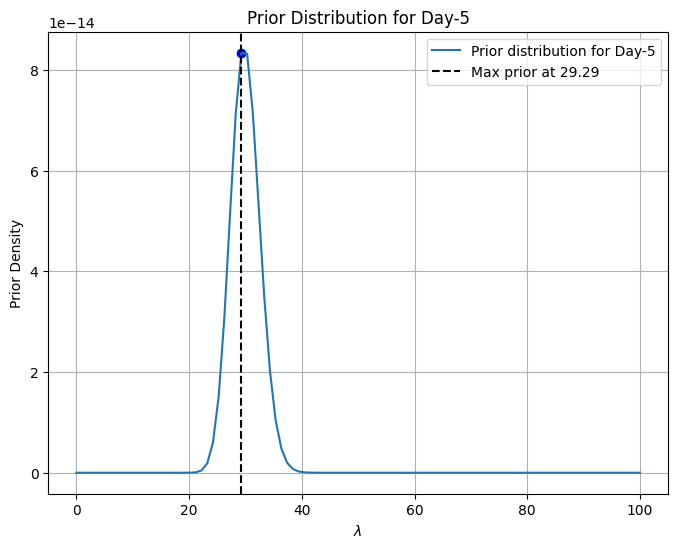

In [14]:
max_index = np.argmax(prior_)
max_lamda = lambda_[max_index]
max_prior = prior_[max_index]

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(lambda_, prior_, label='Prior distribution for Day-5', linestyle='-')
plt.axvline(max_lamda, color='k', linestyle='--', label=f'Max prior at {max_lamda:.2f}')
plt.scatter(max_lamda, max_prior, color='b')
plt.xlabel('$\lambda$')
plt.ylabel('Prior Density')
plt.title('Prior Distribution for Day-5')
plt.legend()
print("Analytically, the Prior-Distribution for Day - 5 will be: Gamma(135.0, 6.0)\n")
plt.show()

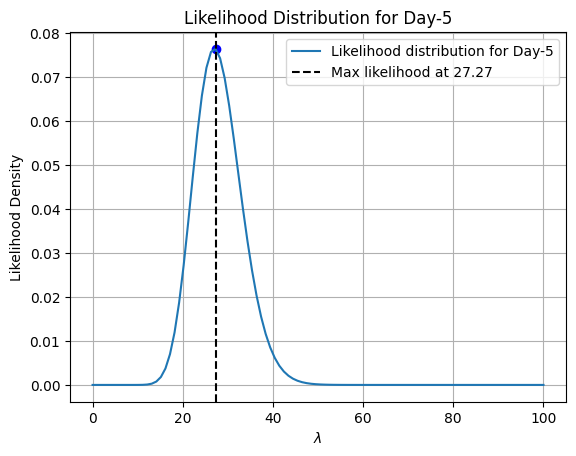

In [15]:
max_index = np.argmax(likelihood_)
max_lamda = lambda_[max_index]
max_likelihood = likelihood_[max_index]
plt.grid()
plt.plot(lambda_, likelihood_, label='Likelihood distribution for Day-5', linestyle='-')
plt.axvline(max_lamda, color='k', linestyle='--', label=f'Max likelihood at {max_lamda:.2f}')
plt.scatter(max_lamda, max_likelihood, color='b')
plt.xlabel('$\lambda$')
plt.ylabel('Likelihood Density')
plt.title('Likelihood Distribution for Day-5')
plt.legend()
plt.show()

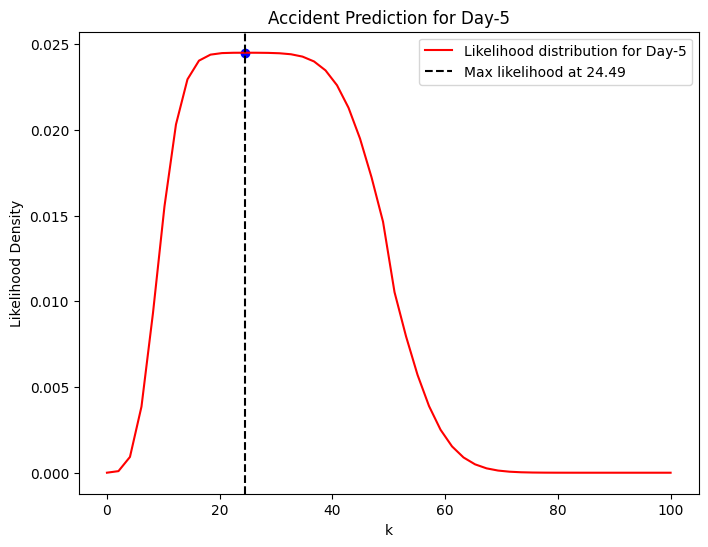

Predicted Number of accidents on Day - 5 will be around : 24 to 25


In [16]:
accidents_assumption = np.linspace(0,100,50)
lambda_new = np.linspace(10,50,50)
prediction_acc = []
plt.figure(figsize=(8, 6))
for lamda in lambda_new:
    likelihood_pred = [likelihood(lamda, int(k)) for k in accidents_assumption]
    prediction_acc.append(likelihood_pred)
    
prediction_acc = np.array(prediction_acc)
# mean for each likelihood prediction appended to prediction_acc array
mean_prediction = np.mean(prediction_acc, axis=0)
plt.plot(accidents_assumption, mean_prediction, label='Likelihood distribution for Day-5',linestyle='-', color = 'r')

max_index = np.argmax(mean_prediction)
max_k = accidents_assumption[max_index]
max_lik = mean_prediction[max_index]

plt.axvline(max_k, color='k', linestyle='--', label=f'Max likelihood at {max_k:.2f}')
plt.scatter(max_k, max_lik, color='b')
plt.xlabel('k')
plt.ylabel('Likelihood Density')
plt.title('Accident Prediction for Day-5')
plt.legend()
plt.show()
print(f'Predicted Number of accidents on Day - 5 will be around : {int(max_k)} to {int(max_k)+1}')

Q4 below

In [17]:
url = "https://raw.githubusercontent.com/yadavhimanshu059/CGS698C/main/notes/Module-2/recognition.csv"
data = pd.read_csv(url)
data = data.iloc[:, 1:]
data.head()

,Tw,Tnw
0,285.077952,296.806019
1,267.518382,280.115725
2,289.920350,310.441680
3,399.067408,324.827633
4,359.988353,373.815164


In [18]:
from scipy.stats import norm, truncnorm
def likelihood(mu,sigma,delta):
    return np.prod(norm.pdf(data["Tw"],mu,sigma))*np.prod(norm.pdf(data["Tnw"],mu+delta,sigma))
def priorMu(mu):
    return norm.pdf(mu,300,50)
def priorDelta(delta):
    return truncnorm.pdf(delta,a=0,b=np.inf,loc=0,scale=50)

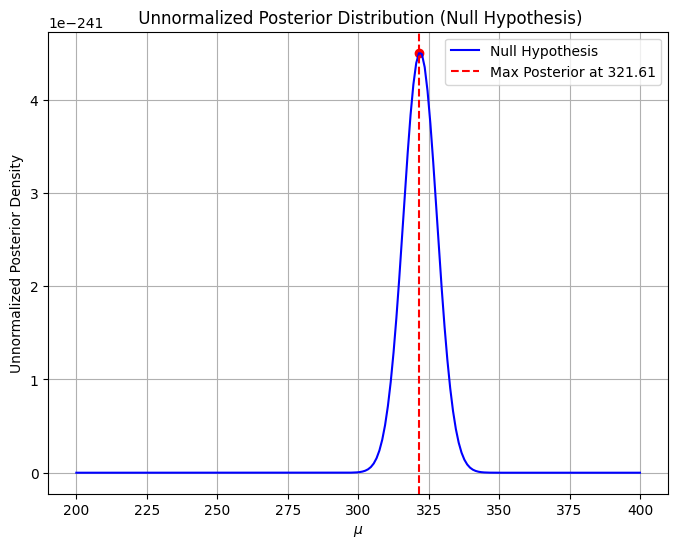

In [19]:
# Unnormalized Posterior Prediction for Null Hypothesis
sigma = 60
# as time in between 200-400
x_label = np.linspace(200,400,200)
y_posterior_null =[priorMu(x_)*likelihood(x_,sigma,delta=0) for x_ in x_label]

plt.figure(figsize=(8, 6))
plt.plot(x_label, y_posterior_null, label='Null Hypothesis', color='b')

max_index = np.argmax(y_posterior_null)
max_mu = x_label[max_index]
max_posterior = y_posterior_null[max_index]

plt.axvline(max_mu, color='r', linestyle='--', label=f'Max Posterior at {max_mu:.2f}')
plt.scatter(max_mu, max_posterior, color='r')
plt.xlabel('$\mu$')
plt.grid()
plt.ylabel('Unnormalized Posterior Density')
plt.title(' Unnormalized Posterior Distribution (Null Hypothesis)')
plt.legend()
plt.show()

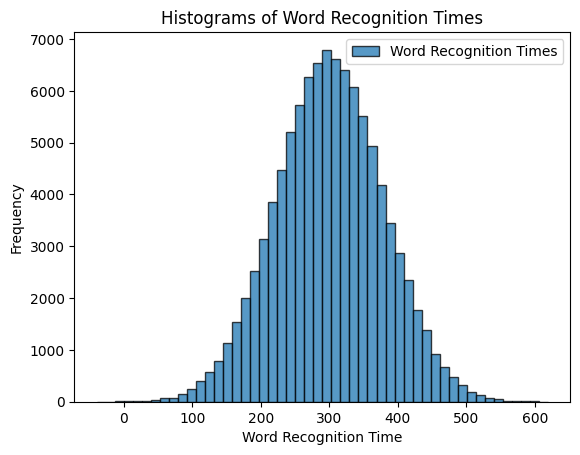

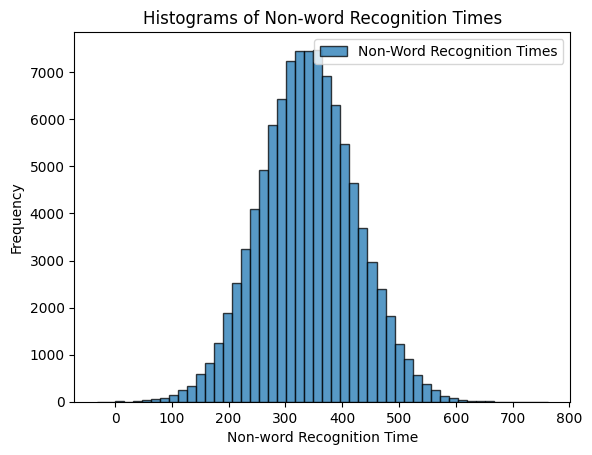

In [20]:
samples = 100000
mu_array = np.random.normal(300,50,samples)
values_delta = np.abs(np.random.normal(0,50,samples))

# non-word recognition times
non_word_recog_time = np.random.normal(mu_array+values_delta,sigma)
word_recog_time = np.random.normal(mu_array,sigma)
plt.hist(word_recog_time,bins = 50, alpha=0.75,edgecolor='k', label='Word Recognition Times')
plt.xlabel('Word Recognition Time')
plt.ylabel('Frequency')
plt.title('Histograms of Word Recognition Times')
plt.legend()
plt.show()

plt.hist(non_word_recog_time,bins = 50, alpha=0.75,edgecolor='k', label='Non-Word Recognition Times')
plt.xlabel('Non-word Recognition Time')
plt.ylabel('Frequency')
plt.title('Histograms of Non-word Recognition Times')
plt.legend()
plt.show()

In word recognition times the delta is zero so prior from null-hypothesis model and lexical-access hypothesis will be same so not comparing

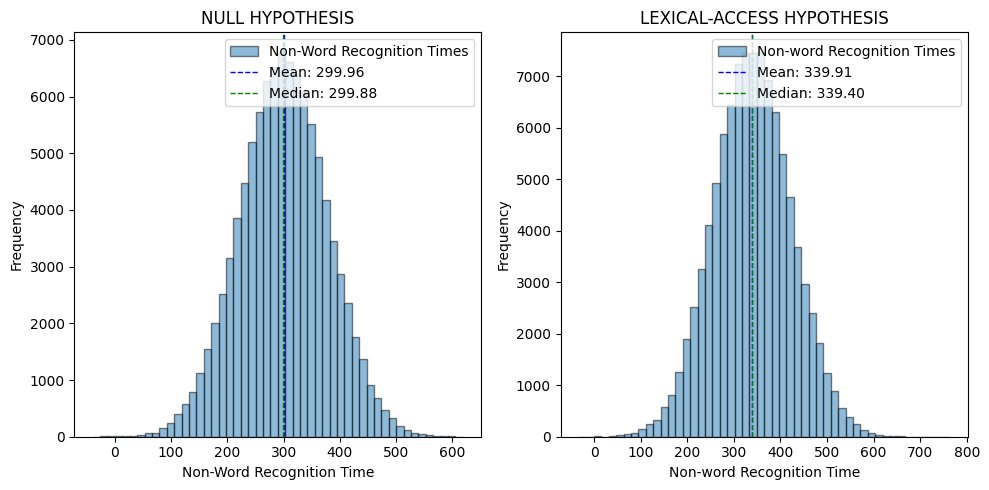

In [21]:
# for non-word recognition times
mean_word = np.mean(word_recog_time)
median_word = np.median(word_recog_time)
mean_nonword = np.mean(non_word_recog_time)
median_nonword = np.median(non_word_recog_time)

fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# this part took help from internet
# non_word in null-hypothesis
counts, bins, patches = axes[0].hist(word_recog_time, bins = 50, alpha=0.5, label='Non-Word Recognition Times', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
axes[0].axvline(mean_word, color='blue', linestyle='dashed', linewidth=1,label=f'Mean: {mean_word:.2f}')
axes[0].axvline(median_word, color='green', linestyle='dashed', linewidth=1,label=f'Median: {median_word:.2f}')
axes[0].set_xlabel('Non-Word Recognition Time')
axes[0].set_ylabel('Frequency')
axes[0].set_title('NULL HYPOTHESIS')
axes[0].legend()
# non_word in lexical
counts, bins, patches = axes[1].hist(non_word_recog_time, bins = 50,alpha=0.5, label='Non-word Recognition Times', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
axes[1].axvline(mean_nonword, color='blue', linestyle='dashed', linewidth=1,label=f'Mean: {mean_nonword:.2f}')
axes[1].axvline(median_nonword, color='green', linestyle='dashed', linewidth=1,label=f'Median: {median_nonword:.2f}')
axes[1].set_xlabel('Non-word Recognition Time')
axes[1].set_ylabel('Frequency')
axes[1].set_title('LEXICAL-ACCESS HYPOTHESIS')
axes[1].legend()

plt.tight_layout()
plt.show()

In [22]:
print(f'NULL HYPOTHESIS Prior: Mean = {mean_word:.2f}, Median = {median_word:.2f}')
print(f'LEXICAL-ACCESS HYPOTHESIS Prior: Mean = {mean_nonword:.2f}, Median = {median_nonword:.2f}')
print("Observation: Predicting a non-word in Lexical Hypothesis takes more time than that of Null Hypothesis.\n")

NULL HYPOTHESIS Prior: Mean = 299.96, Median = 299.88
LEXICAL-ACCESS HYPOTHESIS Prior: Mean = 339.91, Median = 339.40
Observation: Predicting a non-word in Lexical Hypothesis takes more time than that of Null Hypothesis.



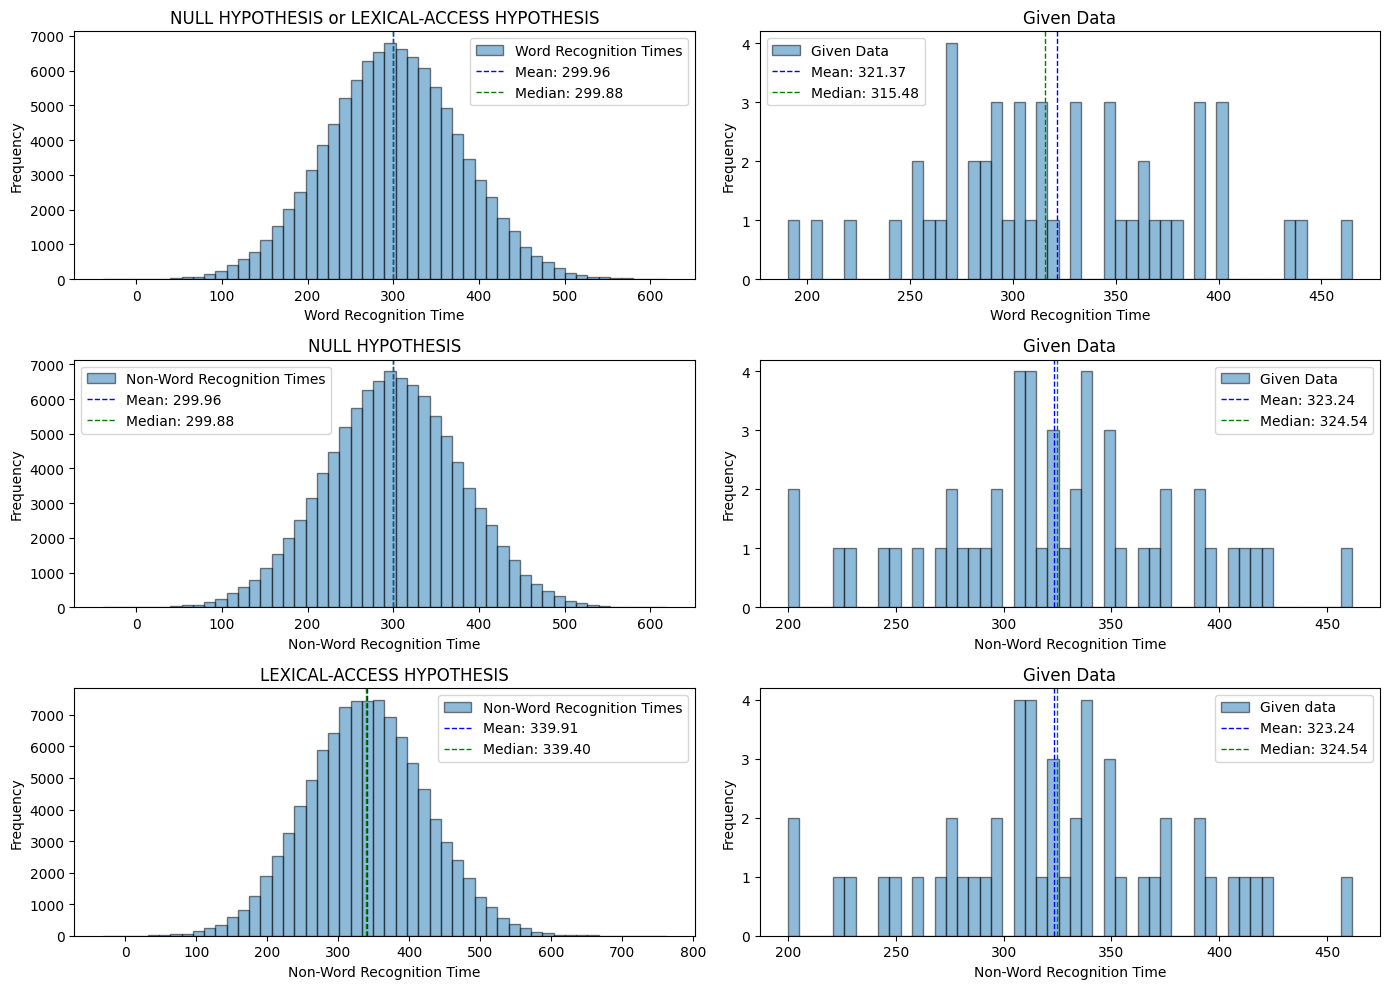

Word recognition time will be same for both model, and they differ only in terms of non-word recognition time so : 

For Null Hypothesis -> Absolute Error for Mean Non-Word-Recognition :  7.202254888310428
For Lexical Hypothesis -> Absolute Error for Mean Non-Word-Recognition :  5.158657567568291

Since, Error in 'LEXICAL-ACCESS HYPOTHESIS' is lesser than 'NULL HYPOTHESIS, so it fits better.



In [23]:
# Comparing Prior Predictions against the given data.

# this part took help from internet
# For NULL HYPOTHESIS :
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))

counts, bins, patches = axes[0, 0].hist(word_recog_time, bins = 50,alpha=0.5, label='Word Recognition Times', edgecolor='black')
axes[0, 0].axvline(mean_word, color='blue', linestyle='dashed', linewidth=1,label=f'Mean: {mean_word:.2f}')
axes[0, 0].axvline(median_word, color='green', linestyle='dashed', linewidth=1,label=f'Median: {median_word:.2f}')
axes[0, 0].set_xlabel('Word Recognition Time')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('NULL HYPOTHESIS or LEXICAL-ACCESS HYPOTHESIS')
axes[0, 0].legend()

counts, bins, patches = axes[0, 1].hist(data["Tw"], bins = 50, alpha=0.5,label='Given Data', edgecolor='black')
axes[0, 1].axvline(np.mean(data["Tw"]), color='blue', linestyle='dashed',linewidth=1, label=f'Mean: {np.mean(data["Tw"]):.2f}')
axes[0, 1].axvline(np.median(data["Tw"]), color='green', linestyle='dashed',linewidth=1, label=f'Median: {np.median(data["Tw"]):.2f}')
axes[0, 1].set_xlabel('Word Recognition Time')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Given Data')
axes[0, 1].legend()

counts, bins, patches = axes[1, 0].hist(word_recog_time, bins = 50,alpha=0.5, label='Non-Word Recognition Times', edgecolor='black')
axes[1, 0].axvline(mean_word, color='blue', linestyle='dashed', linewidth=1,label=f'Mean: {mean_word:.2f}')
axes[1, 0].axvline(median_word, color='green', linestyle='dashed', linewidth=1,label=f'Median: {median_word:.2f}')
axes[1, 0].set_xlabel('Non-Word Recognition Time')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('NULL HYPOTHESIS')
axes[1, 0].legend()

counts, bins, patches = axes[1, 1].hist(data["Tnw"], bins = 50, alpha=0.5,label='Given Data', edgecolor='black')
axes[1, 1].axvline(np.mean(data["Tnw"]), color='blue', linestyle='dashed',linewidth=1, label=f'Mean: {np.mean(data["Tnw"]):.2f}')
axes[1, 1].axvline(np.median(data["Tnw"]), color='green', linestyle='dashed',linewidth=1, label=f'Median: {np.median(data["Tnw"]):.2f}')
axes[1, 1].set_xlabel('Non-Word Recognition Time')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Given Data')
axes[1, 1].legend()

# For Lexical-Access Hypothesis (doing only Non word recognition time).

counts, bins, patches = axes[2,0].hist(non_word_recog_time, bins = 50,alpha=0.5, label='Non-Word Recognition Times', edgecolor='black')
axes[2,0].axvline(mean_nonword, color='blue', linestyle='dashed', linewidth=1,label=f'Mean: {mean_nonword:.2f}')
axes[2,0].axvline(median_nonword, color='green', linestyle='dashed',linewidth=1, label=f'Median: {median_nonword:.2f}')
axes[2,0].set_xlabel('Non-Word Recognition Time')
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('LEXICAL-ACCESS HYPOTHESIS')
axes[2,0].legend()

counts, bins, patches = axes[2,1].hist(data["Tnw"], bins = 50, alpha=0.5,label='Given data', edgecolor='black')
axes[2,1].axvline(np.mean(data["Tnw"]), color='blue', linestyle='dashed',linewidth=1, label=f'Mean: {np.mean(data["Tnw"]):.2f}')
axes[2,1].axvline(np.median(data["Tnw"]), color='green', linestyle='dashed',linewidth=1, label=f'Median: {np.median(data["Tnw"]):.2f}')
axes[2,1].set_xlabel('Non-Word Recognition Time')
axes[2,1].set_ylabel('Frequency')
axes[2,1].set_title('Given Data')
axes[2,1].legend()

plt.tight_layout()
plt.show()

print("Word recognition time will be same for both model, and they differ only in terms of non-word recognition time so : \n")
print("For Null Hypothesis -> Absolute Error for Mean Non-Word-Recognition : ",(np.abs(mean_word - np.mean(data["Tnw"]))/np.mean(data["Tnw"]))*100)
print("For Lexical Hypothesis -> Absolute Error for Mean Non-Word-Recognition : ", (np.abs(mean_nonword - np.mean(data["Tnw"]))/np.mean(data["Tnw"]))*100)

print("\nSince, Error in 'LEXICAL-ACCESS HYPOTHESIS' is lesser than 'NULL HYPOTHESIS, so it fits better.\n")


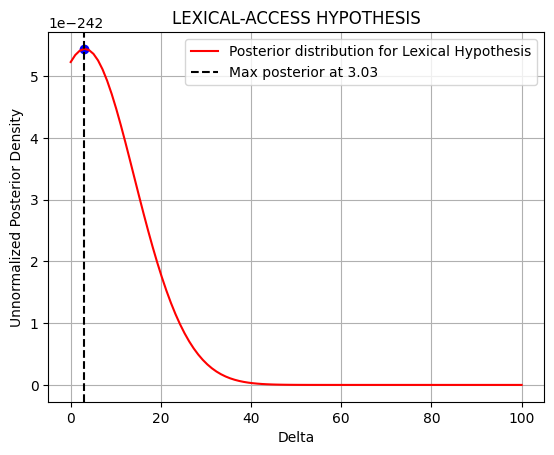

In [24]:
# Posterior Calculation of Delta for Lexical-Access Hypothesis :
mu_samples = np.random.normal(300, 50, 100)
delta_vals = np.linspace(0, 100, 100)
posterior_distribution = []

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

for mu_ in mu_samples:
    temp = [likelihood(mu_, sigma, delta)*np.abs(norm.pdf(delta, 0, 50)) for delta in delta_vals]
    posterior_distribution.append(temp)

posterior_distribution = np.array(posterior_distribution)
# mean of each temp appended to posterior distribution
mean_posterior = np.mean(posterior_distribution, axis=0)

max_index = np.argmax(mean_posterior)
max_delta = delta_vals[max_index]
max_posterior = mean_posterior[max_index]

plt.plot(delta_vals, mean_posterior, label='Posterior distribution for Lexical Hypothesis', linestyle='-', color = 'r')
plt.axvline(max_delta, color='k', linestyle='--', label=f'Max posterior at {max_delta:.2f}')
plt.scatter(max_delta, max_posterior, color='b')
plt.xlabel('Delta')
plt.grid()
plt.ylabel('Unnormalized Posterior Density')
plt.title('LEXICAL-ACCESS HYPOTHESIS')
plt.legend()
plt.show()
